<a href="https://colab.research.google.com/github/LatifulJoy/covid19-cnn-TL-mobilenet/blob/main/covid19_cnn_mobilenet_densenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"latifuljoy","key":"8375469087c63445b1930cfffca3f1b7"}'}

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [5]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 99% 564M/572M [00:18<00:00, 39.5MB/s]
100% 572M/572M [00:19<00:00, 31.5MB/s]


In [6]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [7]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.


In [8]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [10]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['person476_virus_973.jpeg']
image shape (1000, 1664)


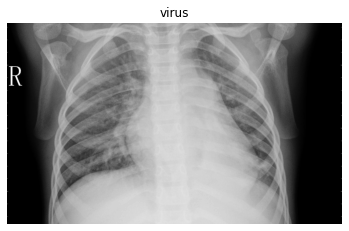

In [11]:
img = view_image("/content/COVID_IEEE/","virus")

['IM-0071-0001.jpeg']
image shape (1558, 2060)


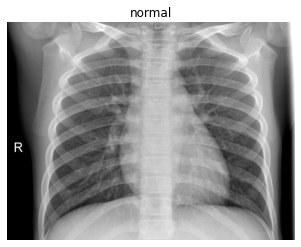

In [13]:
img = view_image("/content/COVID_IEEE/","normal")

['covid1900196.png']
image shape (480, 640, 3)


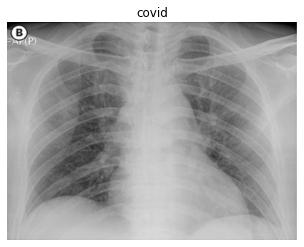

In [15]:
img = view_image("/content/COVID_IEEE/","covid")

In [16]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [17]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [18]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

In [19]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.30, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [21]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [23]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
28/28 [==============================] - 25s 460ms/step - loss: 0.9573 - accuracy: 0.5532 - val_loss: 0.8848 - val_accuracy: 0.5561
Epoch 2/15
28/28 [==============================] - 8s 299ms/step - loss: 0.4183 - accuracy: 0.8533 - val_loss: 0.4151 - val_accuracy: 0.8433
Epoch 3/15
28/28 [==============================] - 8s 298ms/step - loss: 0.6143 - accuracy: 0.8074 - val_loss: 0.4836 - val_accuracy: 0.8564
Epoch 4/15
28/28 [==============================] - 8s 297ms/step - loss: 0.2888 - accuracy: 0.8914 - val_loss: 0.2818 - val_accuracy: 0.8956
Epoch 5/15
28/28 [==============================] - 8s 298ms/step - loss: 0.1903 - accuracy: 0.9295 - val_loss: 0.2620 - val_accuracy: 0.9060
Epoch 6/15
28/28 [==============================] - 8s 304ms/step - loss: 0.1442 - accuracy: 0.9574 - val_loss: 0.4027 - val_accuracy: 0.8903
Epoch 7/15
28/28 [==============================] - 8s 298ms/step - loss: 0.2725 - accuracy: 0.9115 - val_loss: 0.7175 - val_accuracy: 0.7990
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

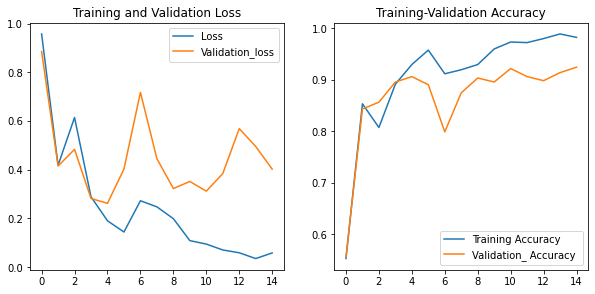

In [24]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [25]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [26]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       157
           1       0.93      0.95      0.94       196
           2       0.97      0.92      0.95       194

    accuracy                           0.95       547
   macro avg       0.95      0.95      0.95       547
weighted avg       0.95      0.95      0.95       547



In [27]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,155,1,1
normal,5,187,4
virus,2,13,179


**Mobilenet**

In [28]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17235968/17225924 [==============================] - 2s 0us/step


In [29]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [30]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [32]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
28/28 [==============================] - 10s 185ms/step - loss: 11.4493 - accuracy: 0.7402 - val_loss: 1.4237 - val_accuracy: 0.9295
Epoch 2/15
28/28 [==============================] - 4s 127ms/step - loss: 0.7759 - accuracy: 0.9586 - val_loss: 2.7665 - val_accuracy: 0.8721
Epoch 3/15
28/28 [==============================] - 4s 128ms/step - loss: 0.9301 - accuracy: 0.9239 - val_loss: 2.3757 - val_accuracy: 0.8773
Epoch 4/15
28/28 [==============================] - 4s 127ms/step - loss: 0.4452 - accuracy: 0.9754 - val_loss: 0.7416 - val_accuracy: 0.9452
Epoch 5/15
28/28 [==============================] - 4s 127ms/step - loss: 0.0484 - accuracy: 0.9933 - val_loss: 0.8161 - val_accuracy: 0.9504
Epoch 6/15
28/28 [==============================] - 4s 127ms/step - loss: 0.0307 - accuracy: 0.9978 - val_loss: 0.9350 - val_accuracy: 0.9452
Epoch 7/15
28/28 [==============================] - 4s 127ms/step - loss: 0.0171 - accuracy: 0.9966 - val_loss: 0.8752 - val_accuracy: 0.9530
Epoc

Text(0.5, 1.0, 'Training-Validation Accuracy')

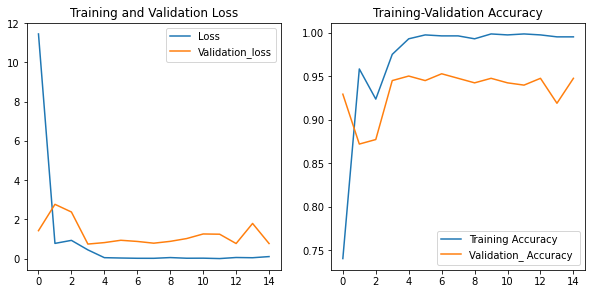

In [33]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [34]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [35]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.96      0.96      0.96       196
           2       0.97      0.96      0.97       194

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547



In [36]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,156,1,0
normal,1,189,6
virus,0,7,187


**Densenet121**

In [37]:
densenet = tf.keras.applications.DenseNet121(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in densenet.layers:
  layer.trainable =False

29097984/29084464 [==============================] - 0s 0us/step


In [38]:
model = Flatten()(densenet.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [39]:
model = Model(inputs = densenet.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [41]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
28/28 [==============================] - 25s 513ms/step - loss: 9.9069 - accuracy: 0.6685 - val_loss: 1.3356 - val_accuracy: 0.9008
Epoch 2/15
28/28 [==============================] - 9s 311ms/step - loss: 0.8395 - accuracy: 0.9227 - val_loss: 0.4426 - val_accuracy: 0.9295
Epoch 3/15
28/28 [==============================] - 9s 311ms/step - loss: 0.1997 - accuracy: 0.9563 - val_loss: 0.4260 - val_accuracy: 0.9191
Epoch 4/15
28/28 [==============================] - 9s 313ms/step - loss: 0.1088 - accuracy: 0.9742 - val_loss: 0.3163 - val_accuracy: 0.9373
Epoch 5/15
28/28 [==============================] - 9s 313ms/step - loss: 0.0547 - accuracy: 0.9854 - val_loss: 0.3725 - val_accuracy: 0.9426
Epoch 6/15
28/28 [==============================] - 9s 315ms/step - loss: 0.0218 - accuracy: 0.9955 - val_loss: 0.2898 - val_accuracy: 0.9399
Epoch 7/15
28/28 [==============================] - 9s 315ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.4424 - val_accuracy: 0.9373
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

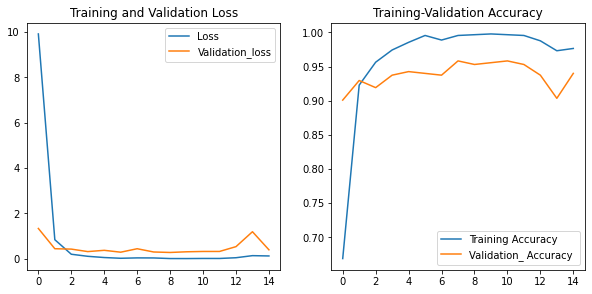

In [42]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [46]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [47]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.97      0.94      0.95       196
           2       0.94      0.97      0.96       194

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547



In [48]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,155,1,1
normal,1,184,11
virus,0,5,189
